# Week 1 ‒ 원티드 국민연금 DB를 이용해서 유니콘 기업 발굴하기

# 1. 데이터셋 불러오기
- 회사 수: 약 5,000개
- 월별 데이터: 직원 수, 국민연금 보험료 (인원 수에 대한 상한선_최대고지금액 이 존재함)
- 년 단위 데이터: 매출액 (천원 단위)

In [54]:
# 필요 라이브러리 호출 및 세팅
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

plt.rc("font",family = "Malgun Gothic")
plt.rc("axes",unicode_minus = False)
pd.options.display.float_format = '{:20,.0f}'.format

In [55]:
# 데이터셋 불러오기
df = pd.read_csv('company_nps_data.csv', encoding='cp949')
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [56]:
# 데이터 사이즈 및 컬럼별 타입확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [57]:
# 기본통계 확인
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,"99,801","99,801","99,801","99,801","99,801","99,801"
mean,"276,298","30,535,893","2,017",7,"9,734,079",38
std,"133,903","301,664,669",1,4,"43,472,560",147
min,63,"-7,882,176","2,015",1,0,0
25%,"165,530","1,409,760","2,016",4,"1,181,160",6
50%,"259,149","3,573,585","2,017",7,"2,332,760",11
75%,"382,656","9,582,321","2,018",10,"5,591,860",24
max,"5,159,723","11,328,779,396","2,019",12,"978,067,260","3,133"


# 2. 이상 데이터 확인

In [58]:
# 월별 직원수가 0인 데이터 확인
df[df['월별_직원수'] == 0]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
4450,478999,394790,2016,3,0,0
6162,568445,740245,2018,10,0,0
7251,288014,3709457,2016,11,0,0
12176,568445,740245,2018,8,0,0
20070,550603,416881,2018,1,0,0
33869,439536,237277,2016,10,0,0
39671,602137,892176,2018,6,0,0
49592,291968,4059302,2016,4,0,0
54026,277054,95478,2016,5,0,0
64139,472629,1915700,2018,1,0,0


In [59]:
# 아래 회사(ID : 472629)의 경우 2018년 1월의 연금보험료 및 직원수 데이터와 2017년 데이터 전체가 누락되어 있음
# 정보누락 및 오류가 있는 데이터셋으로 보임 -> 어떻게 처리할지 확인 필요
df[df['회사ID'] == 472629].sort_values(by = ['년도', '월'])

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
52659,472629,1116472,2016,1,368100,4
85454,472629,1116472,2016,2,368100,4
5260,472629,1116472,2016,3,368100,4
46958,472629,1116472,2016,4,368100,4
91370,472629,1116472,2016,5,368100,4
57480,472629,1116472,2016,6,368100,4
72105,472629,1116472,2016,7,230740,3
80069,472629,1116472,2016,8,230740,3
86888,472629,1116472,2016,9,230740,3
8455,472629,1116472,2016,10,230740,3


# 3. 월별 총급여액 계산
- 월급여액의 9%가 연금보험료로 산정됨
- 회사가 4.5%, 근로자가 4.5% 부담하는 방식
- 주어진 월별 연금보험료 정보로 회사가 지급하는 월별 총급여액 계산

In [60]:
df['월별_총급여'] = df['월별_연금보험료'] * 2 / 0.09
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_총급여
0,233757,41688077,2018,7,8912380,36,"198,052,889"
1,123464,1760695,2018,3,942380,5,"20,941,778"
2,342124,3221341,2018,7,781180,4,"17,359,556"
3,386420,4815584,2015,11,3795900,14,"84,353,333"
4,129243,9799736,2018,10,40724680,151,"904,992,889"
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,"53,394,222"
99797,239388,1045021,2018,10,1428800,9,"31,751,111"
99798,272304,181898,2018,3,392560,4,"8,723,556"
99799,362194,2100218,2018,12,874780,3,"19,439,556"


# 4. 연매출액, 직원수 기준 상위기업 확인

In [61]:
# 회사ID, 연도로 groupby하여 df_grouped에 저장
# 회사별로 자료가 존재하는 전체 기간에 대해 연매출액, 연금보험료, 총급여, 직원수 평균값 계산
df_grouped = df.groupby(['회사ID', '년도'])[['연매출액', '월별_연금보험료', '월별_총급여', '월별_직원수']].agg('mean')
df_grouped

,,연매출액,월별_연금보험료,월별_총급여,월별_직원수
회사ID,년도,,,,
63,2018,"11,328,779,396","410,128,228","9,113,960,630","1,007"
95,2018,"656,947,437","214,837,843","4,774,174,296",541
102,2018,"742,658,938","173,769,522","3,861,544,944",752
295,2018,"83,776,697","77,312,035","1,718,045,222",260
414,2018,"19,732,769","77,590,193","1,724,226,519",248
...,...,...,...,...,...
2400284,2018,"1,263,406","1,055,497","23,455,492",5
2437574,2018,"214,016","636,740","14,149,778",3
2693684,2019,"238,076","438,120","9,736,000",3


In [62]:
# 연매출액이 1000억원 이상인 데이터 df_grouped_rev에 저장
df_grouped_rev = df_grouped[df_grouped['연매출액']>100000000].reset_index()
df_grouped_rev

,회사ID,년도,연매출액,월별_연금보험료,월별_총급여,월별_직원수
0,63,2018,"11,328,779,396","410,128,228","9,113,960,630","1,007"
1,95,2018,"656,947,437","214,837,843","4,774,174,296",541
2,102,2018,"742,658,938","173,769,522","3,861,544,944",752
3,597,2018,"208,141,595","54,797,752","1,217,727,815",179
4,2842,2018,"113,877,008","23,773,902","528,308,926",63
...,...,...,...,...,...,...
283,510329,2018,"143,513,683","132,535,903","2,945,242,296",582
284,547586,2018,"283,610,660","388,365,113","8,630,335,852","1,513"
285,567650,2018,"113,663,897","503,567","11,190,370",3
286,580356,2018,"278,460,000","278,409,680","6,186,881,778",768


In [63]:
# 회사ID, 년도 컬럼 int -> object 타입으로 변환
df_grouped_rev[['회사ID','년도']] = df_grouped_rev[['회사ID','년도']].astype(object)
df_grouped_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사ID      288 non-null    object 
 1   년도        288 non-null    object 
 2   연매출액      288 non-null    float64
 3   월별_연금보험료  288 non-null    float64
 4   월별_총급여    288 non-null    float64
 5   월별_직원수    288 non-null    float64
dtypes: float64(4), object(2)
memory usage: 13.6+ KB


In [64]:
# 2018년 기준 연매출액 상위 10개 기업
top_revenue = df_grouped_rev[df_grouped_rev['년도']==2018].sort_values(by = '연매출액', ascending = False).head(20)
top_revenue

,회사ID,년도,연매출액,월별_연금보험료,월별_총급여,월별_직원수
0,63,2018,"11,328,779,396","410,128,228","9,113,960,630","1,007"
237,419945,2018,"8,391,469,199","822,147,535","18,269,945,222","2,624"
136,227415,2018,"5,521,038,494","909,976,637","20,221,703,037","2,367"
132,227414,2018,"4,933,525,226","945,096,660","21,002,148,000","2,434"
241,419977,2018,"4,157,069,000","403,506,628","8,966,813,963","1,250"
183,294649,2018,"4,152,465,961","108,394,922","2,408,776,037",274
244,419998,2018,"3,512,597,764","315,211,788","7,004,706,407",817
45,126831,2018,"2,206,140,616","239,661,025","5,325,800,556",586
204,381180,2018,"1,618,894,425","64,047,517","1,423,278,148",166
247,420008,2018,"1,301,747,031","285,844,818","6,352,107,074",733


In [65]:
# 2018년 기준 직원수 상위 20개 기업
top_employee = df_grouped_rev[df_grouped_rev['년도']==2018].sort_values(by = '월별_직원수', ascending = False).head(20)
top_employee

,회사ID,년도,연매출액,월별_연금보험료,월별_총급여,월별_직원수
237,419945,2018,"8,391,469,199","822,147,535","18,269,945,222","2,624"
132,227414,2018,"4,933,525,226","945,096,660","21,002,148,000","2,434"
136,227415,2018,"5,521,038,494","909,976,637","20,221,703,037","2,367"
164,294337,2018,"287,134,819","440,364,375","9,785,875,000","2,087"
284,547586,2018,"283,610,660","388,365,113","8,630,335,852","1,513"
14,126521,2018,"567,246,558","536,575,855","11,923,907,889","1,486"
216,403351,2018,"415,269,293","391,532,782","8,700,728,481","1,478"
18,126538,2018,"721,901,349","420,689,718","9,348,660,407","1,277"
241,419977,2018,"4,157,069,000","403,506,628","8,966,813,963","1,250"
220,403359,2018,"156,550,808","357,849,580","7,952,212,889","1,161"


In [66]:
# 매출액, 직원수 모두 상위 20개에 드는 기업 df_sample에 저장
# 해당 기업들은 데이터가 존재하는 연도 범위가 다름
df_sample = top_employee[top_employee['회사ID'].isin(top_revenue['회사ID'].tolist())]
df_sample

,회사ID,년도,연매출액,월별_연금보험료,월별_총급여,월별_직원수
237,419945,2018,"8,391,469,199","822,147,535","18,269,945,222","2,624"
132,227414,2018,"4,933,525,226","945,096,660","21,002,148,000","2,434"
136,227415,2018,"5,521,038,494","909,976,637","20,221,703,037","2,367"
18,126538,2018,"721,901,349","420,689,718","9,348,660,407","1,277"
241,419977,2018,"4,157,069,000","403,506,628","8,966,813,963","1,250"
0,63,2018,"11,328,779,396","410,128,228","9,113,960,630","1,007"
22,126606,2018,"1,035,707,054","355,463,882","7,899,197,370",953
287,630190,2018,"657,402,850","317,002,457","7,044,499,037",822
244,419998,2018,"3,512,597,764","315,211,788","7,004,706,407",817
2,102,2018,"742,658,938","173,769,522","3,861,544,944",752


In [67]:
# 총 11개사 후보로 분석 진행
df_sample.shape

(11, 6)

# 5. 필요 컬럼 생성

In [68]:
# df_sample로 추린 11개 기업에 대한 전체 정보 df_sample_full에 저장
df_sample_full = df[df['회사ID'].isin(df_sample['회사ID'].tolist())]
df_sample_full

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_총급여
308,419977,4334414000,2016,5,370003820,1313,"8,222,307,111"
387,126606,1035707054,2018,4,342894700,937,"7,619,882,222"
597,227414,4644329868,2017,9,906576960,2360,"20,146,154,667"
647,419977,4334414000,2016,11,379000020,1273,"8,422,222,667"
1060,102,742658938,2018,6,169826560,725,"3,773,923,556"
...,...,...,...,...,...,...,...
98333,419945,8391469199,2018,2,806372240,2652,"17,919,383,111"
98344,420008,1489566686,2016,6,117081960,339,"2,601,821,333"
99231,420008,1301747031,2018,12,294177160,729,"6,537,270,222"
99447,420008,1301747031,2018,7,297287820,734,"6,606,396,000"


In [69]:
# 연매출액(억원) 컬럼 생성
df_sample_full['연매출액(억원)'] = df_sample_full['연매출액'] / 10000
df_sample_full

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_총급여,연매출액(억원)
308,419977,4334414000,2016,5,370003820,1313,"8,222,307,111","433,441"
387,126606,1035707054,2018,4,342894700,937,"7,619,882,222","103,571"
597,227414,4644329868,2017,9,906576960,2360,"20,146,154,667","464,433"
647,419977,4334414000,2016,11,379000020,1273,"8,422,222,667","433,441"
1060,102,742658938,2018,6,169826560,725,"3,773,923,556","74,266"
...,...,...,...,...,...,...,...,...
98333,419945,8391469199,2018,2,806372240,2652,"17,919,383,111","839,147"
98344,420008,1489566686,2016,6,117081960,339,"2,601,821,333","148,957"
99231,420008,1301747031,2018,12,294177160,729,"6,537,270,222","130,175"
99447,420008,1301747031,2018,7,297287820,734,"6,606,396,000","130,175"


In [70]:
# 직원당 평균월급여 컬럼 생성
df_sample_full['평균_월급여'] = df_sample_full['월별_총급여'] / df_sample_full['월별_직원수']
df_sample_full

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_총급여,연매출액(억원),평균_월급여
308,419977,4334414000,2016,5,370003820,1313,"8,222,307,111","433,441","6,262,229"
387,126606,1035707054,2018,4,342894700,937,"7,619,882,222","103,571","8,132,212"
597,227414,4644329868,2017,9,906576960,2360,"20,146,154,667","464,433","8,536,506"
647,419977,4334414000,2016,11,379000020,1273,"8,422,222,667","433,441","6,616,043"
1060,102,742658938,2018,6,169826560,725,"3,773,923,556","74,266","5,205,412"
...,...,...,...,...,...,...,...,...,...
98333,419945,8391469199,2018,2,806372240,2652,"17,919,383,111","839,147","6,756,932"
98344,420008,1489566686,2016,6,117081960,339,"2,601,821,333","148,957","7,674,989"
99231,420008,1301747031,2018,12,294177160,729,"6,537,270,222","130,175","8,967,449"
99447,420008,1301747031,2018,7,297287820,734,"6,606,396,000","130,175","9,000,540"


In [71]:
# 연월 컬럼 생성
df_sample_full['연월'] = df_sample_full['년도'].astype(str) + '-' + df_sample_full['월'].astype(str)
df_sample_full

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_총급여,연매출액(억원),평균_월급여,연월
308,419977,4334414000,2016,5,370003820,1313,"8,222,307,111","433,441","6,262,229",2016-5
387,126606,1035707054,2018,4,342894700,937,"7,619,882,222","103,571","8,132,212",2018-4
597,227414,4644329868,2017,9,906576960,2360,"20,146,154,667","464,433","8,536,506",2017-9
647,419977,4334414000,2016,11,379000020,1273,"8,422,222,667","433,441","6,616,043",2016-11
1060,102,742658938,2018,6,169826560,725,"3,773,923,556","74,266","5,205,412",2018-6
...,...,...,...,...,...,...,...,...,...,...
98333,419945,8391469199,2018,2,806372240,2652,"17,919,383,111","839,147","6,756,932",2018-2
98344,420008,1489566686,2016,6,117081960,339,"2,601,821,333","148,957","7,674,989",2016-6
99231,420008,1301747031,2018,12,294177160,729,"6,537,270,222","130,175","8,967,449",2018-12
99447,420008,1301747031,2018,7,297287820,734,"6,606,396,000","130,175","9,000,540",2018-7


In [99]:
df_sample_full[['회사ID', '년도', '월']] = df_sample_full[['회사ID', '년도', '월']].astype('category')
df_sample_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   회사ID      340 non-null    category      
 1   연매출액      340 non-null    int64         
 2   년도        340 non-null    category      
 3   월         340 non-null    category      
 4   월별_연금보험료  340 non-null    int64         
 5   월별_직원수    340 non-null    int64         
 6   월별_총급여    340 non-null    float64       
 7   연매출액(억원)  340 non-null    float64       
 8   평균_월급여    340 non-null    float64       
 9   연월        340 non-null    datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(3), int64(3)
memory usage: 20.7 KB


In [73]:
df_sample_full['연월'] = pd.to_datetime(df_sample_full['연월'], infer_datetime_format= True)
df_sample_full

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_총급여,연매출액(억원),평균_월급여,연월
308,419977,4334414000,2016,5,370003820,1313,"8,222,307,111","433,441","6,262,229",2016-05-01
387,126606,1035707054,2018,4,342894700,937,"7,619,882,222","103,571","8,132,212",2018-04-01
597,227414,4644329868,2017,9,906576960,2360,"20,146,154,667","464,433","8,536,506",2017-09-01
647,419977,4334414000,2016,11,379000020,1273,"8,422,222,667","433,441","6,616,043",2016-11-01
1060,102,742658938,2018,6,169826560,725,"3,773,923,556","74,266","5,205,412",2018-06-01
...,...,...,...,...,...,...,...,...,...,...
98333,419945,8391469199,2018,2,806372240,2652,"17,919,383,111","839,147","6,756,932",2018-02-01
98344,420008,1489566686,2016,6,117081960,339,"2,601,821,333","148,957","7,674,989",2016-06-01
99231,420008,1301747031,2018,12,294177160,729,"6,537,270,222","130,175","8,967,449",2018-12-01
99447,420008,1301747031,2018,7,297287820,734,"6,606,396,000","130,175","9,000,540",2018-07-01


In [81]:
df_sample_full = df_sample_full.sort_values(by = ['회사ID', '연월']).reset_index(drop = True)
df_sample_full

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_총급여,연매출액(억원),평균_월급여,연월
0,63,11328779396,2018,1,403119840,1006,"8,958,218,667","1,132,878","8,904,790",2018-01-01
1,63,11328779396,2018,2,406770960,1018,"9,039,354,667","1,132,878","8,879,523",2018-02-01
2,63,11328779396,2018,3,404826240,1013,"8,996,138,667","1,132,878","8,880,690",2018-03-01
3,63,11328779396,2018,4,404211800,1012,"8,982,484,444","1,132,878","8,875,973",2018-04-01
4,63,11328779396,2018,5,400339640,1002,"8,896,436,444","1,132,878","8,878,679",2018-05-01
...,...,...,...,...,...,...,...,...,...,...
335,630190,657402850,2018,8,352245700,902,"7,827,682,222","65,740","8,678,140",2018-08-01
336,630190,657402850,2018,9,356008880,915,"7,911,308,444","65,740","8,646,239",2018-09-01
337,630190,657402850,2018,10,362167300,936,"8,048,162,222","65,740","8,598,464",2018-10-01
338,630190,657402850,2018,11,371085480,965,"8,246,344,000","65,740","8,545,434",2018-11-01


In [82]:
# 샘플 데이터 확인 : 회사ID 63
# 11개사 중 연매출액은 가장 크나 2018년 데이터밖에 없음
s1 = df_sample_full[df_sample_full['회사ID'] == 63].sort_values(by = '연월')
s1

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_총급여,연매출액(억원),평균_월급여,연월
0,63,11328779396,2018,1,403119840,1006,"8,958,218,667","1,132,878","8,904,790",2018-01-01
1,63,11328779396,2018,2,406770960,1018,"9,039,354,667","1,132,878","8,879,523",2018-02-01
2,63,11328779396,2018,3,404826240,1013,"8,996,138,667","1,132,878","8,880,690",2018-03-01
3,63,11328779396,2018,4,404211800,1012,"8,982,484,444","1,132,878","8,875,973",2018-04-01
4,63,11328779396,2018,5,400339640,1002,"8,896,436,444","1,132,878","8,878,679",2018-05-01
5,63,11328779396,2018,6,401083100,1011,"8,912,957,778","1,132,878","8,815,982",2018-06-01
6,63,11328779396,2018,7,418169080,1009,"9,292,646,222","1,132,878","9,209,758",2018-07-01
7,63,11328779396,2018,8,418292620,1011,"9,295,391,556","1,132,878","9,194,255",2018-08-01
8,63,11328779396,2018,9,416186660,999,"9,248,592,444","1,132,878","9,257,850",2018-09-01
9,63,11328779396,2018,10,414503020,996,"9,211,178,222","1,132,878","9,248,171",2018-10-01


In [83]:
# 샘플 데이터 확인 : 회사ID 419977
# 연매출액 감소세를 보임
s2 = df_sample_full[df_sample_full['회사ID'] == 419977].sort_values(by = '연월')
s2

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_총급여,연매출액(억원),평균_월급여,연월
220,419977,4334414000,2016,1,380100160,1372,"8,446,670,222","433,441","6,156,465",2016-01-01
221,419977,4334414000,2016,2,376285860,1362,"8,361,908,000","433,441","6,139,433",2016-02-01
222,419977,4334414000,2016,3,372238400,1346,"8,271,964,444","433,441","6,145,590",2016-03-01
223,419977,4334414000,2016,4,373469040,1333,"8,299,312,000","433,441","6,226,041",2016-04-01
224,419977,4334414000,2016,5,370003820,1313,"8,222,307,111","433,441","6,262,229",2016-05-01
225,419977,4334414000,2016,6,370949720,1321,"8,243,327,111","433,441","6,240,217",2016-06-01
226,419977,4334414000,2016,7,390743940,1322,"8,683,198,667","433,441","6,568,229",2016-07-01
227,419977,4334414000,2016,8,393532820,1331,"8,745,173,778","433,441","6,570,378",2016-08-01
228,419977,4334414000,2016,9,390316340,1317,"8,673,696,444","433,441","6,585,950",2016-09-01
229,419977,4334414000,2016,10,384893440,1296,"8,553,187,556","433,441","6,599,682",2016-10-01


In [94]:
df_sample_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   회사ID      340 non-null    object        
 1   연매출액      340 non-null    int64         
 2   년도        340 non-null    object        
 3   월         340 non-null    object        
 4   월별_연금보험료  340 non-null    int64         
 5   월별_직원수    340 non-null    int64         
 6   월별_총급여    340 non-null    float64       
 7   연매출액(억원)  340 non-null    float64       
 8   평균_월급여    340 non-null    float64       
 9   연월        340 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 26.7+ KB


# 6. 그래프로 변화 확인
- 연도별 매출액
- 월별 직원수
- 월별 총급여
- 월별 1인당 급여

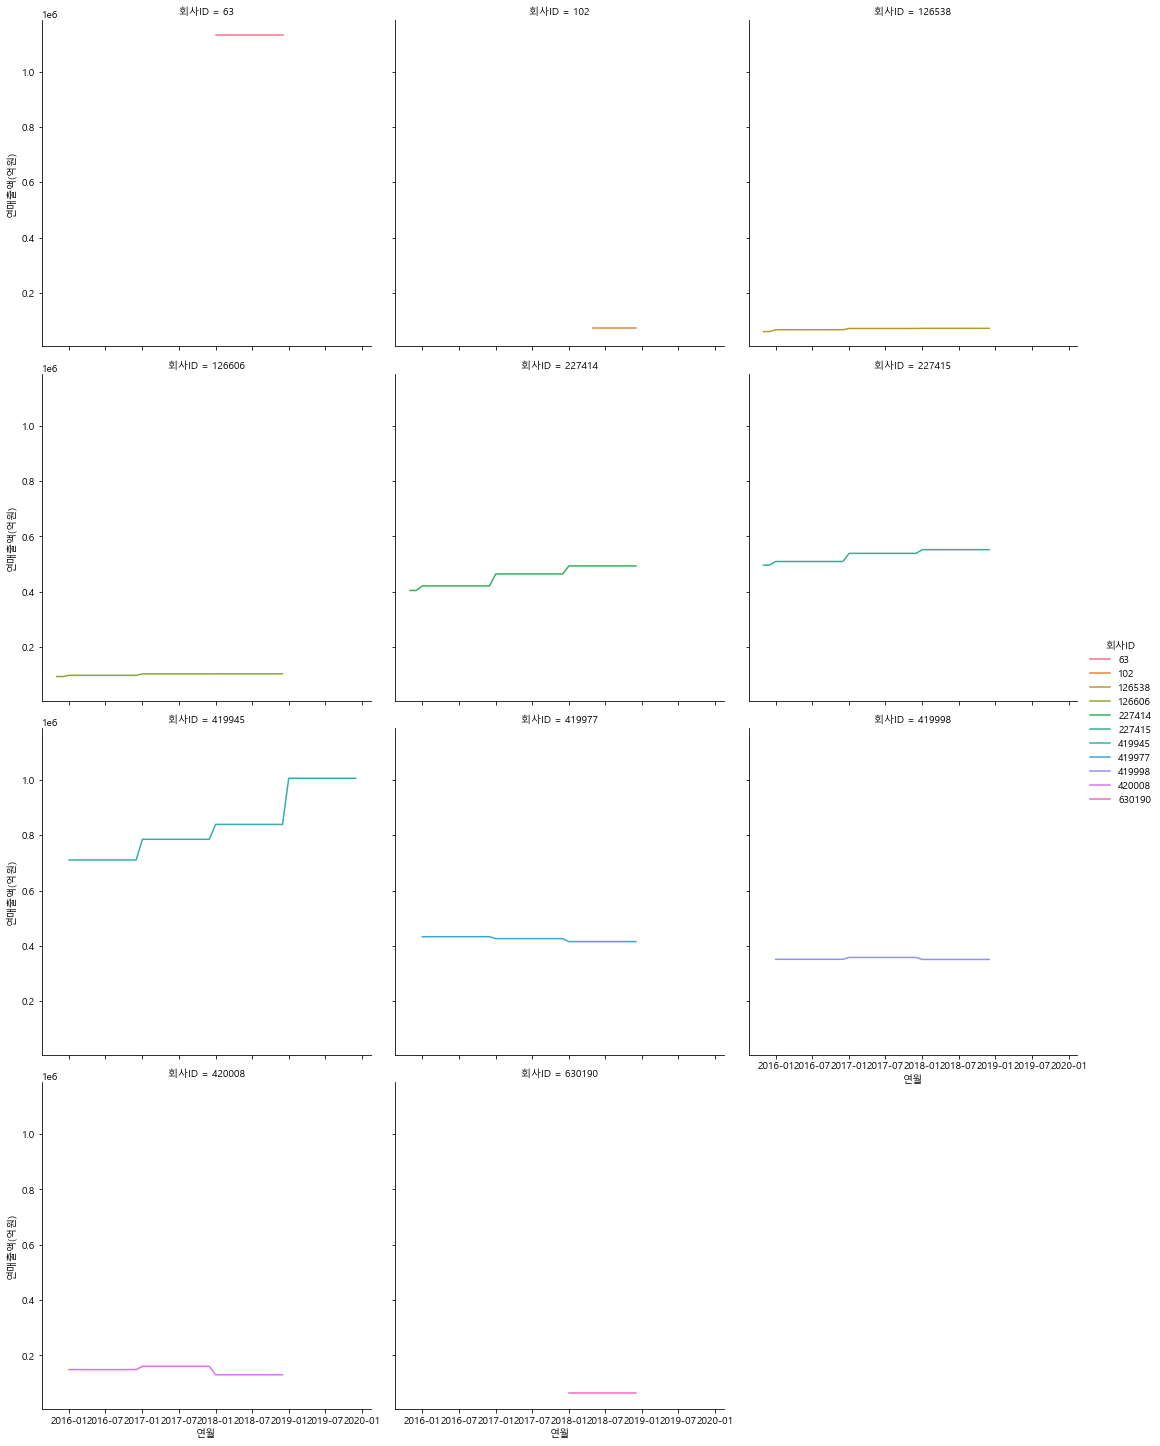

In [124]:
# 연도별 매출액 비교
# 1년치 자료밖에 없는 63, 102, 630190과 매출 하락구간이 있었던 419977, 419998, 420008은 분석에서 제외할 수 있을 것으로 보임
sns.relplot(data=df_sample_full, x = '연월', y = '연매출액(억원)', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

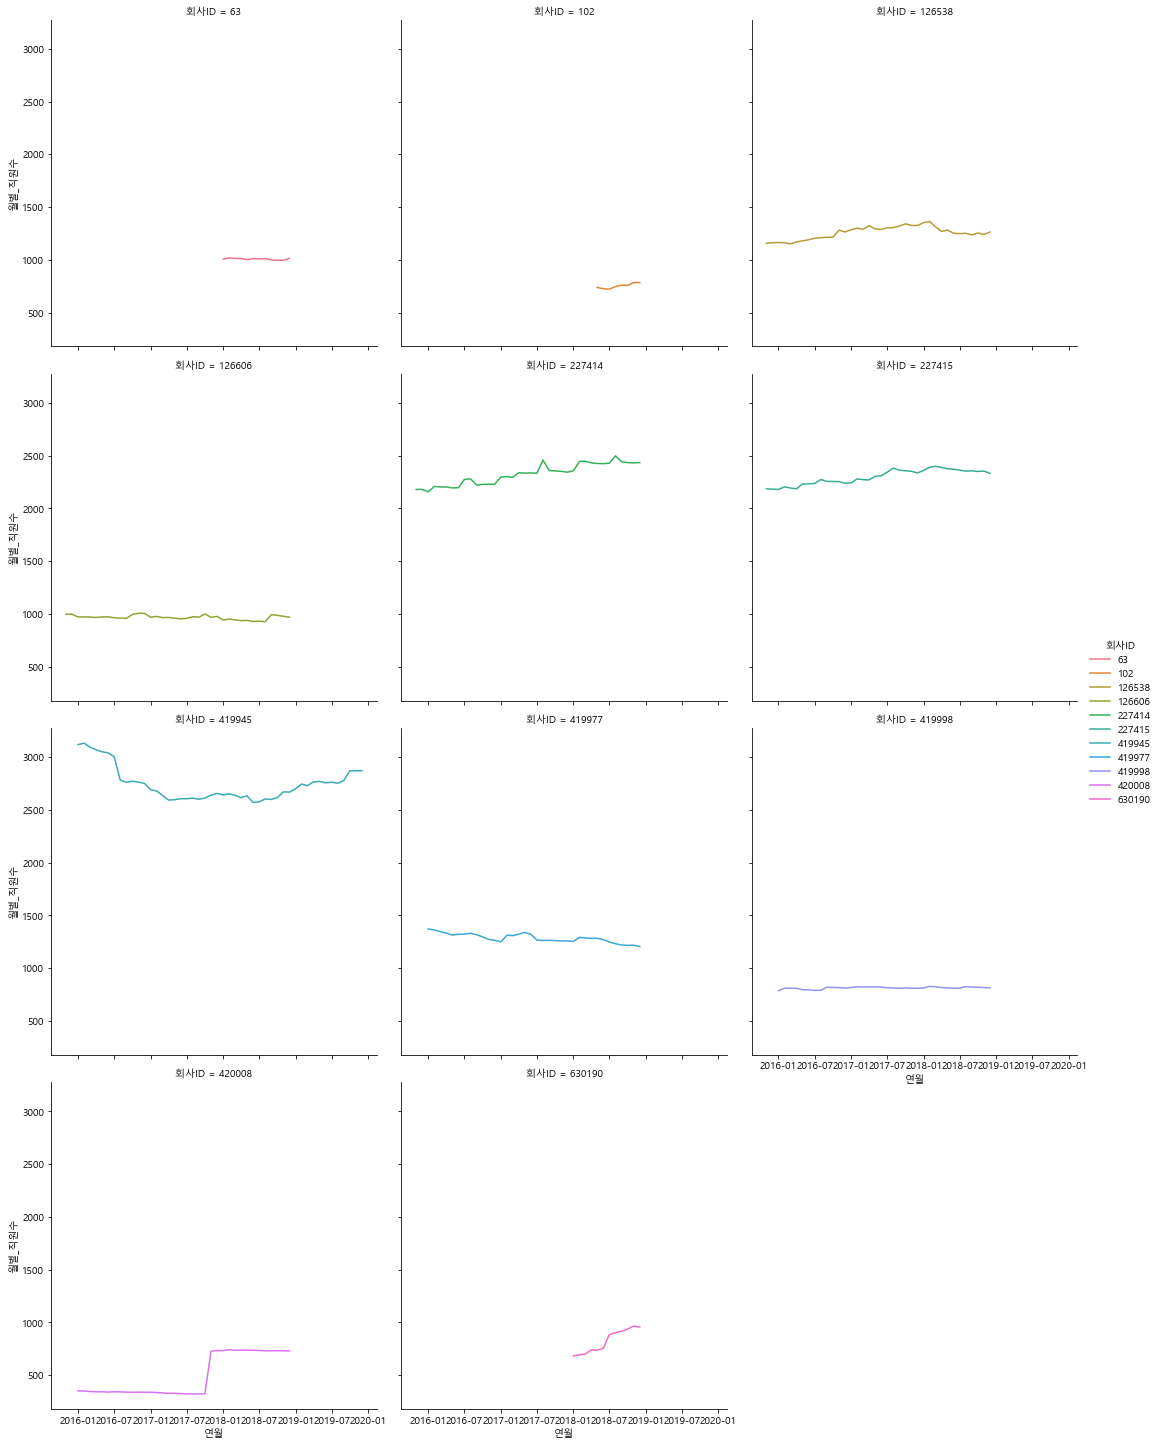

In [119]:
# 연도별 직원수 비교
# 직원수 변화가 거의 없거나 뚜렷한 감소세가 있었던 63, 419945, 419977, 419998은 유니콘 기업일 가능성이 적을 것으로 보임
# 직원수가 성장하다가 감소구간이 나타난 126538, 227415는 더 자세한 분석이 필요할 것으로 보임
sns.relplot(data=df_sample_full, x = '연월', y = '월별_직원수', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

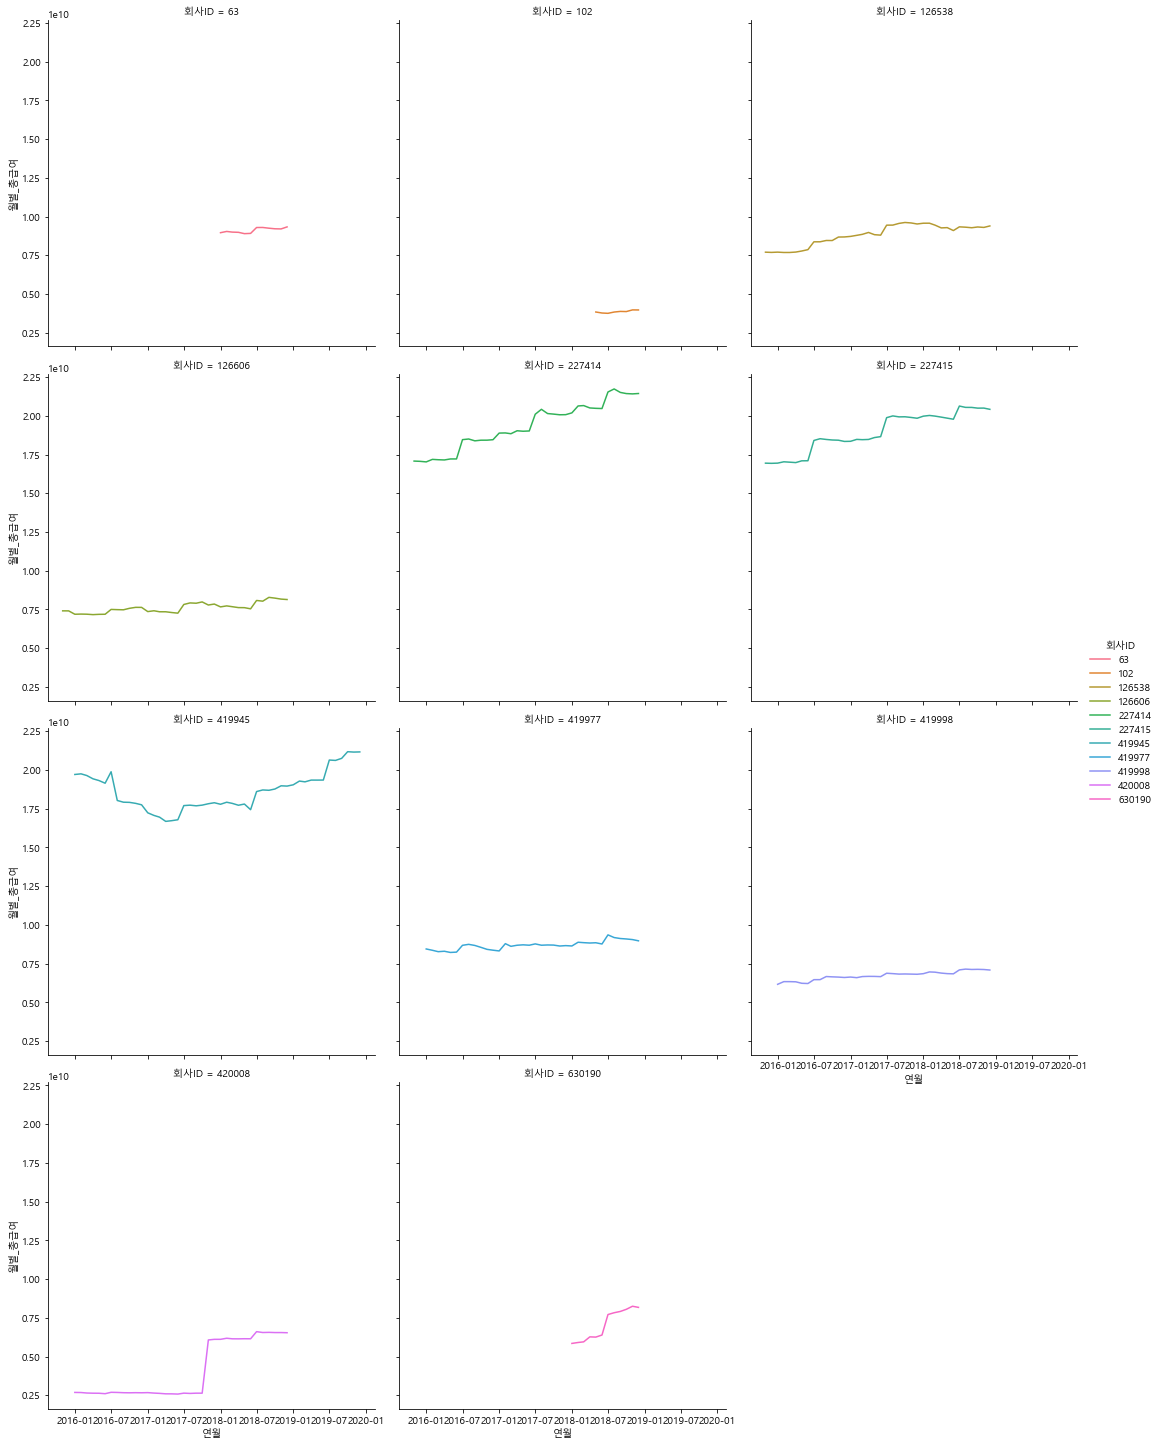

In [109]:
# 연도별 총급여 비교
sns.relplot(data=df_sample_full, x = '연월', y = '월별_총급여', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

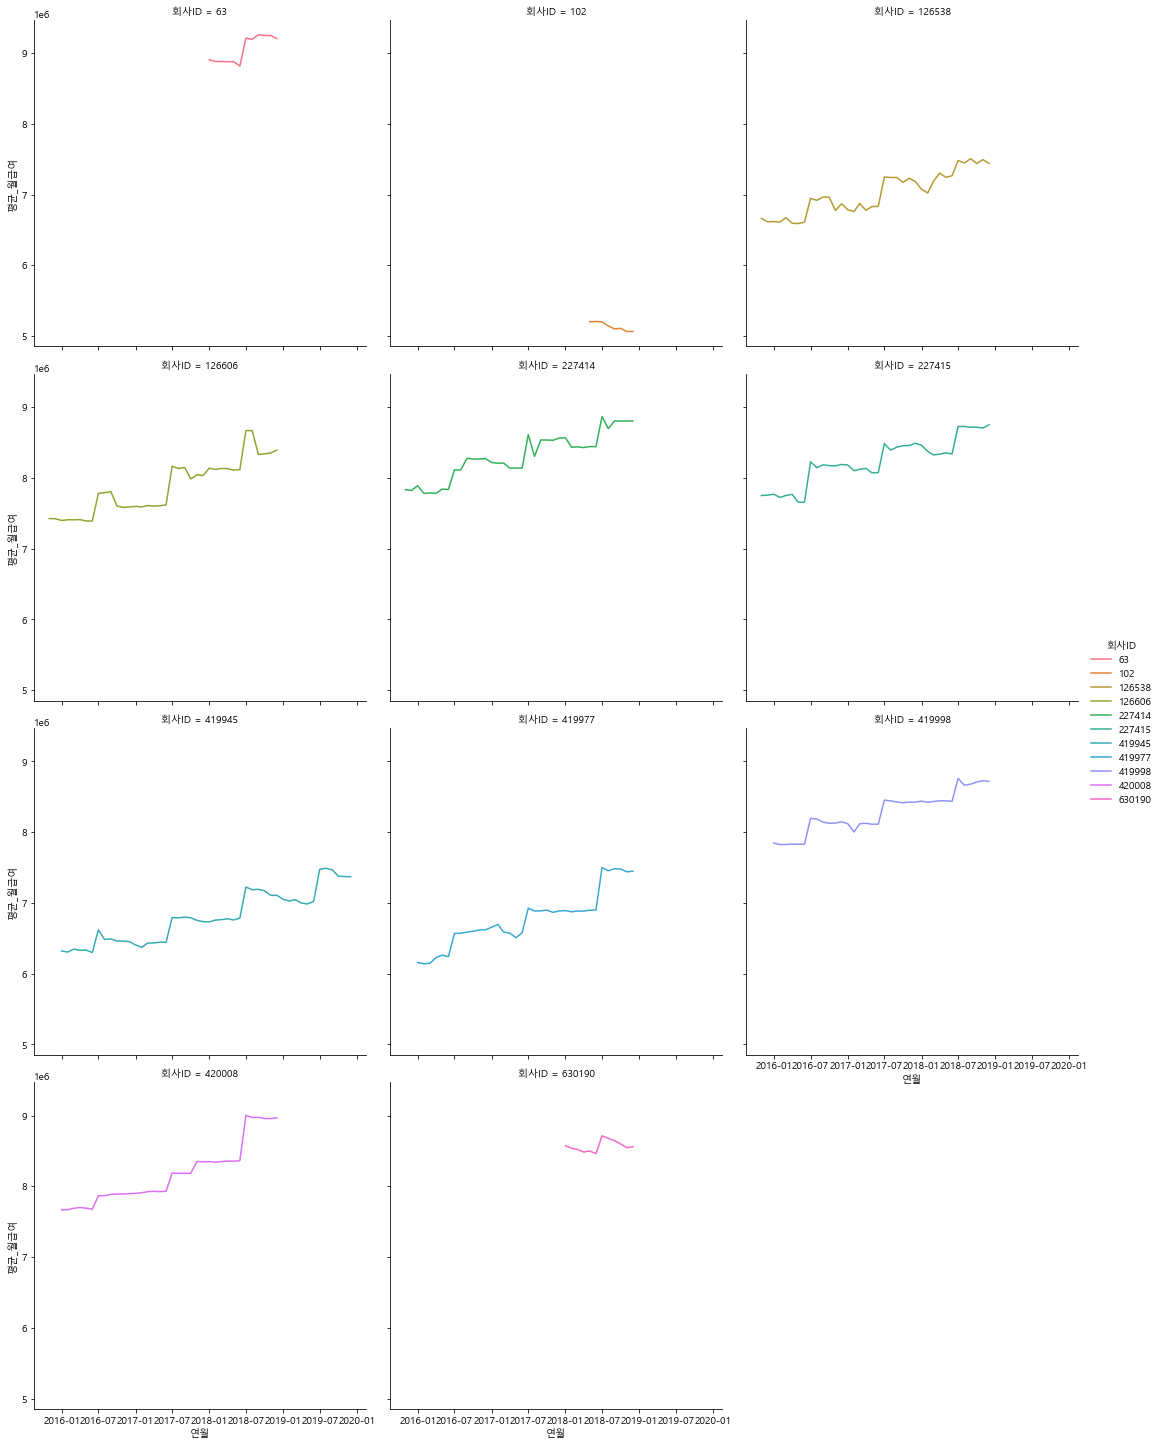

In [110]:
# 연도별 1인당 급여 비교
sns.relplot(data=df_sample_full, x = '연월', y = '평균_월급여', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

In [114]:
# 4에서 선정한 11개 기업 중 매출액이 지속적으로 상승했던 기업은 아래 5개사
# 직원수, 총급여, 1인당 급여 등의 지표는 더 자세히 분석할 필요가 있을 것으로 보임
set(df_sample_full['회사ID']) - set([63, 102, 630190, 419977, 419998, 420008])

{126538, 126606, 227414, 227415, 419945}